In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 37.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from google.colab import drive
import os

from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install face_recognition
!pip uninstall -y numpy
!pip install numpy==1.23.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566162 sha256=d0644ef349a0ee9afb0636e37432ddb3a8d1614dfb0b549016d4698e9c0d261a
  Stored in directory: /root/.cache/pip/wheels/04/52/ec/9355da79c29f160b038a20c784db2803c2f9fa2c8a462c176a
Successfully built face-recognition-models
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 63.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
tenso

In [ ]:
import face_recognition

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
model = YOLO("/content/drive/MyDrive/smart_glasses/smart_glasses/runs10epochs5-3-2025/detect/train/weights/best.pt")

In [40]:
class_names = ["person", "bicycle", "car", "motorcycle", "bed", "bus", "desk", "table", "door", "fridge", "toilet", "sofa", "sink", "microwave", "bench", "chair", "fan", "closet", "stairs", "crosswalk", "pedestrian Traffic Light (walk)", "pedestrian Traffic Light (stop)", "face", "A", "B", "W", "Y"]


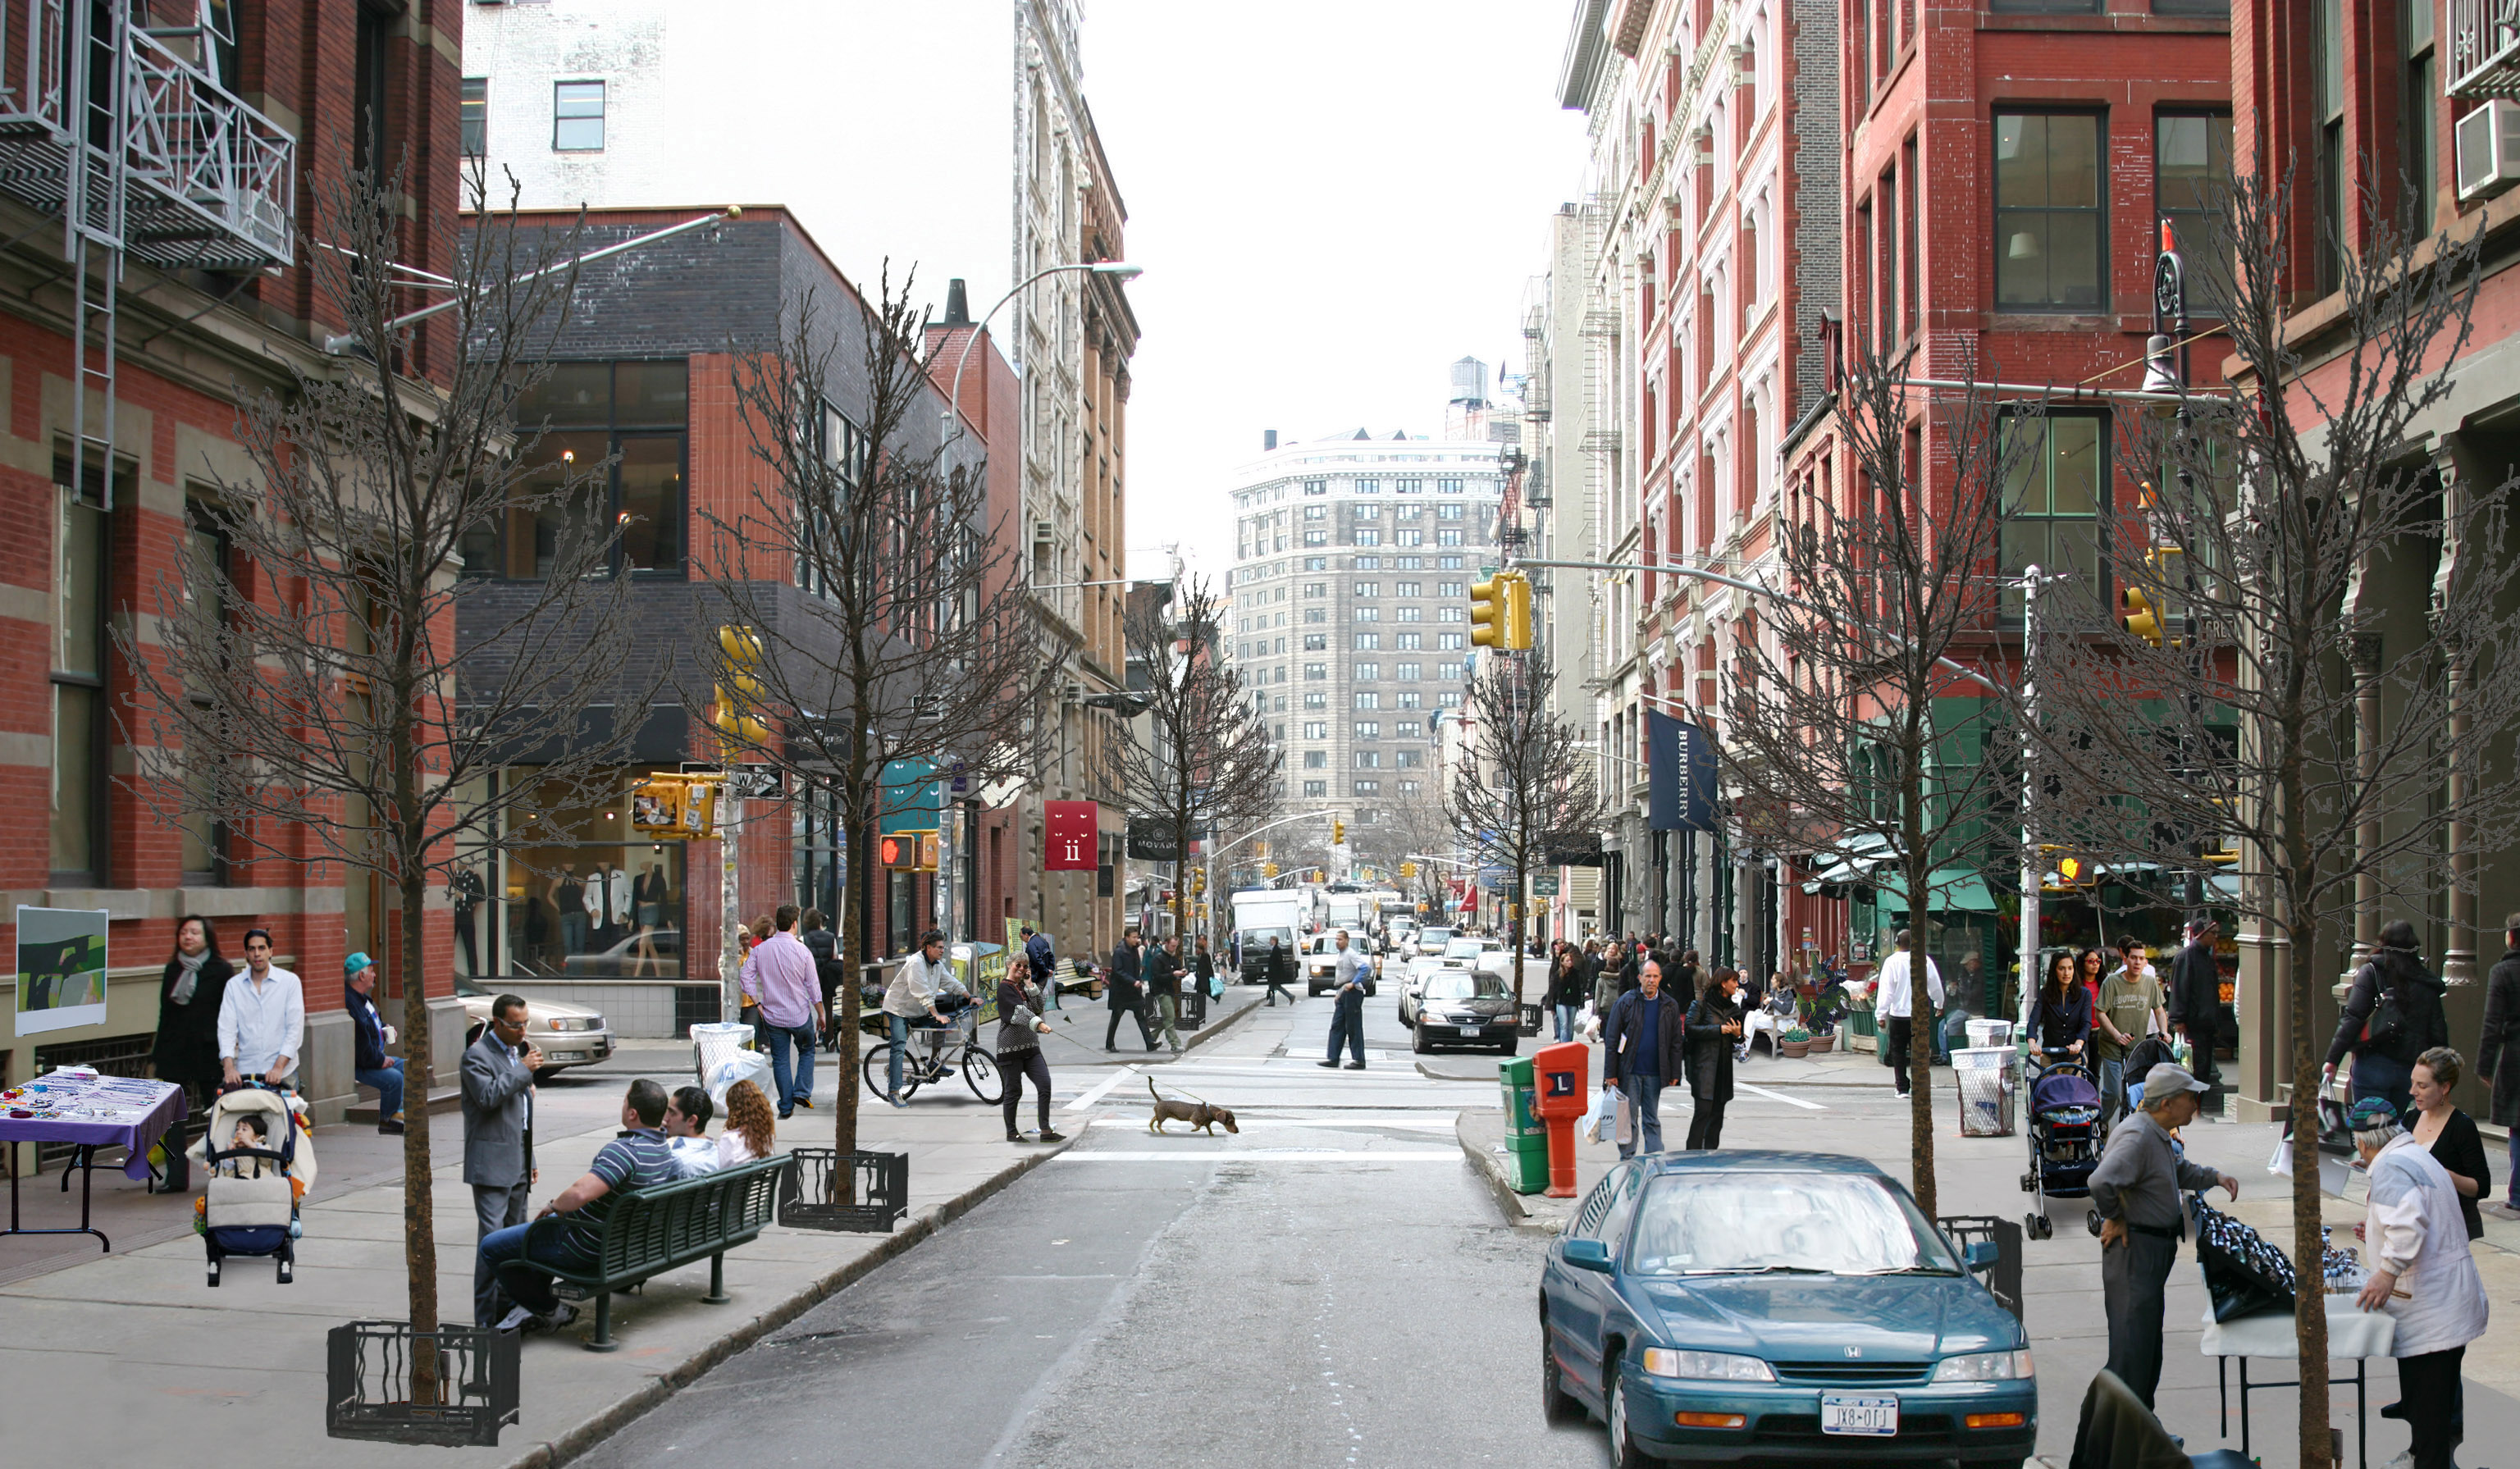

In [ ]:
Image("street.jpg")

In [ ]:
results = model.predict("street.jpg")


image 1/1 /content/street.jpg: 384x640 18 persons, 1 bicycle, 2 cars, 1 bench, 65.2ms
Speed: 10.9ms preprocess, 65.2ms inference, 329.2ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
results[0].save("results_street.jpg")

'results_street.jpg'

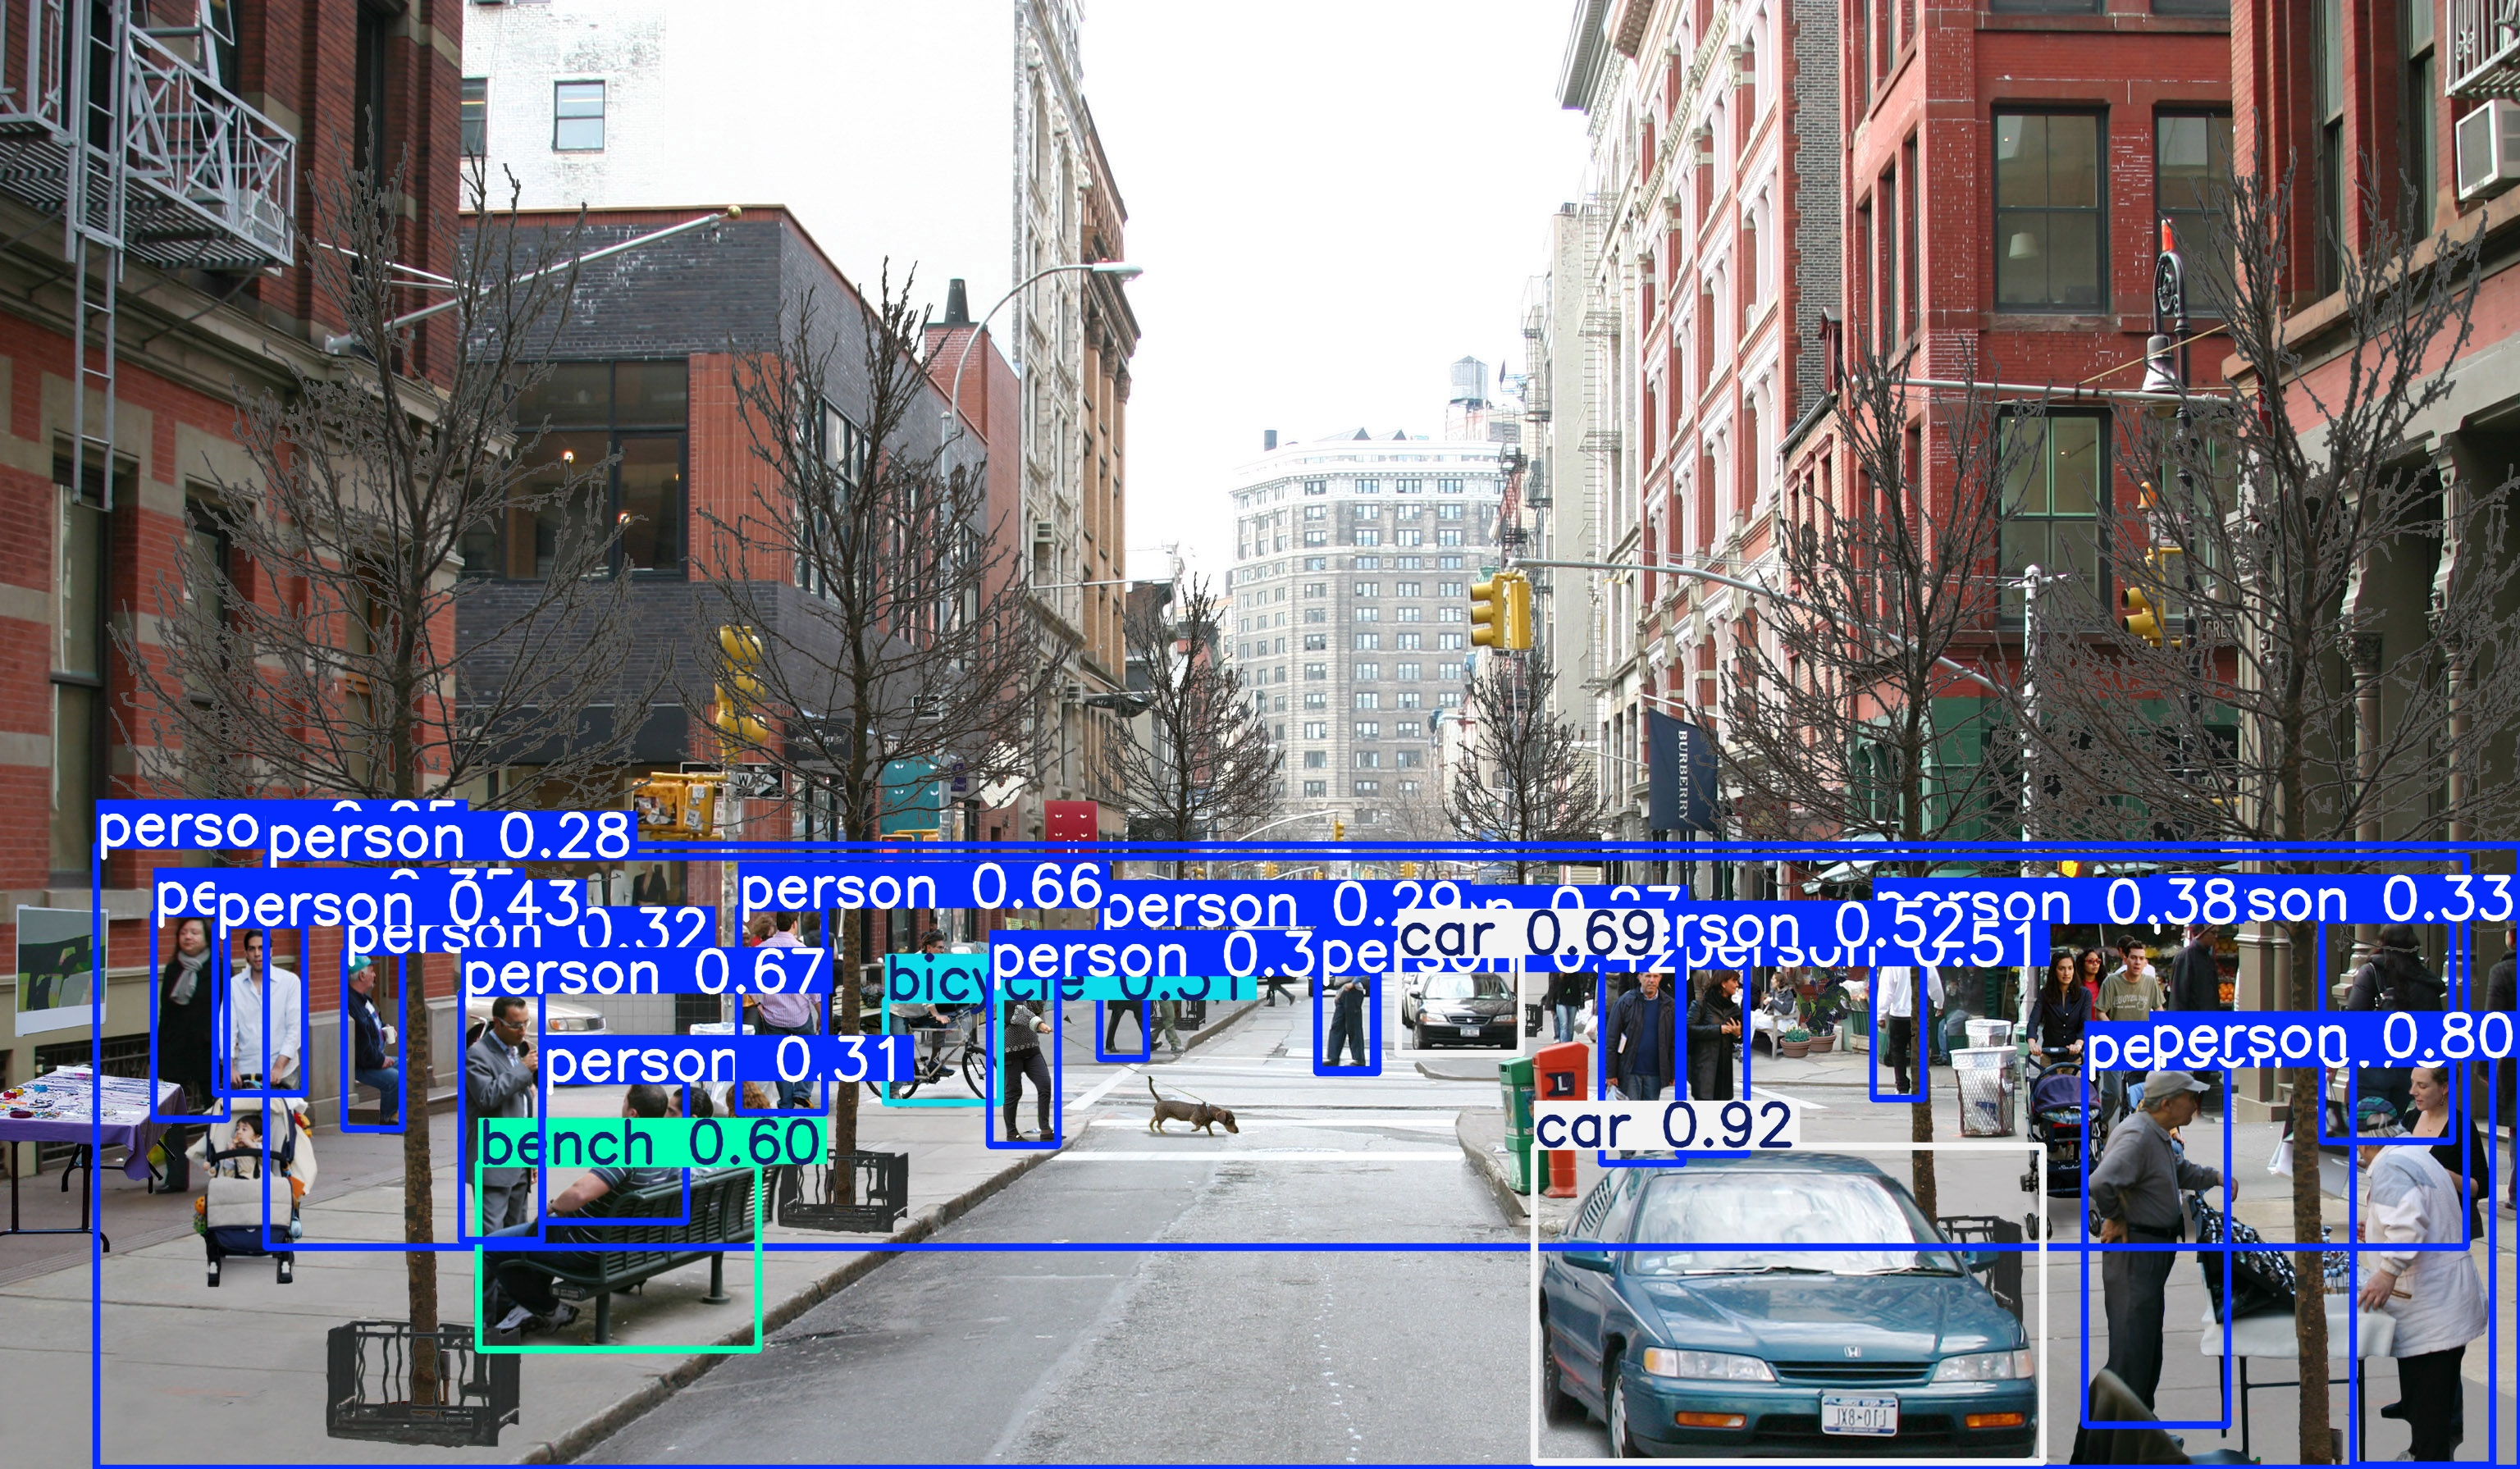

In [ ]:
Image("results_street.jpg")

In [18]:
from PIL import Image

frame_width, frame_height = Image.open("results_street.jpg").size

print(f"Width: {frame_width}, Height: {frame_height}")


Width: 3072, Height: 1791


In [32]:
import cv2
import numpy as np

def draw_sectors(image_path, width, height):

    image = cv2.imread(image_path)

    left_end = int(width * 0.25)
    center_start = left_end
    center_end = int(width * 0.75)

    image_with_lines = image.copy()
    cv2.line(image_with_lines, (left_end, 0), (left_end, height), (255, 0, 0), 5)
    cv2.line(image_with_lines, (center_end, 0), (center_end, height), (255, 0, 0), 5)

    return image_with_lines

In [33]:
image_with_lines = draw_sectors("street.jpg", frame_width, frame_height)

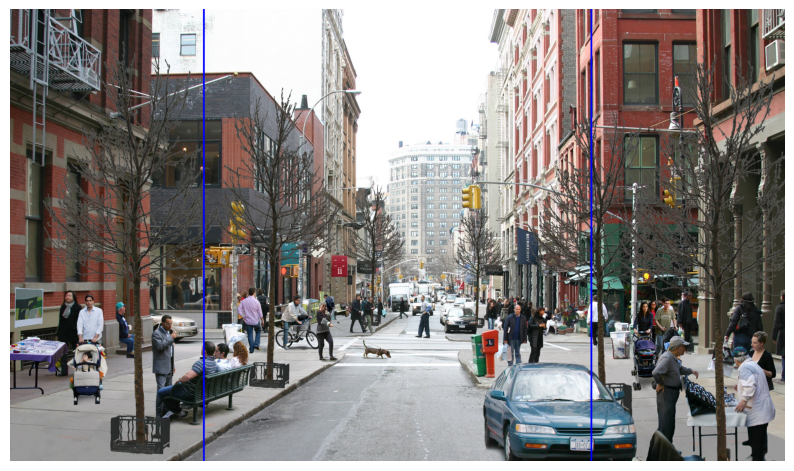

In [34]:
from matplotlib import pyplot as plt
image_rgb = cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()


In [51]:
def split_detections_by_sector(detections, width, height, class_names, outdoor_mode=False):

    sectors = {
        "left": [0, int(width * 0.25)],
        "center": [int(width * 0.25), int(width * 0.75)],
        "right": [int(width * 0.75), width]
    }

    counts = {
        "left": {},
        "center": {},
        "right": {}
    }
    alert_status = {"alert_status": False, "object": None}

    alert_classes = ["car", "bus", "bicycle", "motorcycle", "pedestrian Traffic Light (stop)"]

    for detection in detections.boxes.data:
        x1, y1, x2, y2, confidence, label = map(float, detection[:6])
        label = class_names[int(label)]

        center_x = (x1 + x2) / 2

        if center_x < sectors["left"][1]:
            sector = "left"
        elif center_x < sectors["center"][1]:
            sector = "center"
        else:
            sector = "right"

        if label in counts[sector]:
            counts[sector][label] += 1
        else:
            counts[sector][label] = 1


        if sector == "center" and outdoor_mode and label in alert_classes:
            alert_status = {"alert_status": True, "object": label}
            return alert_status

    return counts


In [52]:
result = split_detections_by_sector(results[0], frame_width, frame_height, class_names, outdoor_mode=True)

In [53]:
result

{'alert_status': True, 'object': 'car'}

In [54]:
result = split_detections_by_sector(results[0], frame_width, frame_height, class_names, outdoor_mode=False)

In [55]:
result

{'left': {'person': 5, 'bench': 1},
 'center': {'car': 2, 'person': 9, 'bicycle': 1},
 'right': {'person': 4}}

In [56]:
def generate_text_results(result):
    if "alert_status" in result:
        return [f"Be careful, there is a {result['object']} in front of you"]

    sectors_text = []

    sector_order = ["center", "left", "right"]
    sector_phrases = {
        "center": "in front of you",
        "left": "on your left",
        "right": "on your right"
    }

    for sector in sector_order:
        if sector in result and result[sector]:
            object_descriptions = []
            for label, count in result[sector].items():

                if count > 1:
                    object_descriptions.append(f"{count} {label}s")
                else:
                    object_descriptions.append(f"{count} {label}")

            objects_text = ", and ".join(object_descriptions)
            sectors_text.append(f"there are {objects_text} {sector_phrases[sector]}")

    return sectors_text


In [59]:
generate_text_results(result)

['there are 2 cars, and 9 persons, and 1 bicycle in front of you',
 'there are 5 persons, and 1 bench on your left',
 'there are 4 persons on your right']

In [60]:
sent = "\n".join(generate_text_results(result))

In [71]:
print(sent)

there are 2 cars, and 9 persons, and 1 bicycle in front of you
there are 5 persons, and 1 bench on your left
there are 4 persons on your right


In [61]:
!pip install gTTs

In [68]:
from gtts import gTTS
tts = gTTS(sent, lang='en', slow=False)
tts.save('results.mp3')

In [69]:
from IPython.display import Audio

Audio("results.mp3")